In [51]:
import random
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

### Random Dataset

In [2]:
dataset = {'k': [[1, 2], [2, 3], [1, 3]], 'r': [[6, 5], [7, 8], [7, 6]]}
n_feature = [5, 7]

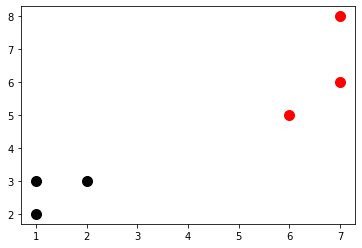

In [3]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.show()

### KNN algorithm

In [57]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        print('k is set to va,ue less than total voting groups')

    distance = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(
                np.array(features) - np.array(predict))
            distance.append([euclidean_distance, group])

    votes = [i[1] for i in sorted(distance)[:k]]
    #     print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]

    return vote_result

### Prediction

In [14]:
result = k_nearest_neighbors(data=dataset, predict=n_feature, k=3)
print(result)

[('r', 3)]
r


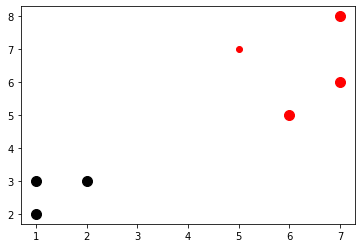

In [78]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(n_feature[0], n_feature[1], color=result)
plt.show()

## Breast cancer dataset

In [52]:
file_path_data = "./BreastCancer/breast-cancer-wisconsin.data"
df = pd.read_csv(file_path_data, delimiter=",")
df.columns = [
    'id', 'Clump-Thickness', 'Uniformity-Cell-Size', 'Uniformity-Cell-Shape',
    'Marginal-Adhesion', 'Single-Epithelial-Cell-Size', 'Bare-Nuclei',
    'Bland Chromatin', 'Normal-Nucleoli', 'Mitoses', 'Class'
]
df

,id,Clump-Thickness,Uniformity-Cell-Size,Uniformity-Cell-Shape,Marginal-Adhesion,Single-Epithelial-Cell-Size,Bare-Nuclei,Bland Chromatin,Normal-Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [53]:
df.replace('?', -99999, inplace=True)
# df['Bare-Nuclei'] = df['Bare-Nuclei'].astype(str).astype(int)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()
full_data[:3]
random.shuffle(full_data)

### Train & Test data split

In [77]:
test_size = 0.2
train_set = {2: [], 4: []}
test_set = {2: [], 4: []}
train_data = full_data[:-int(test_size * len(full_data))]
test_data = full_data[-int(test_size * len(full_data)):]
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

len(train_data), len(test_data), len(test_set[2]), len(test_set[4]), len(
    train_set[2]), len(train_set[2])

(559, 139, 97, 42, 360, 360)

### Predict Accuracy

In [69]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=3)
        if group == vote:
            correct += 1
        total += 1
print('accuracy', correct / total)

accuracy 0.9712230215827338


1.0